In [55]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

seed = np.random.seed(42)

pd.options.display.float_format = '{:,.3f}'.format
pd.set_option('display.max_columns', 15) 
pd.set_option('display.max_rows', 50)

# 1. Data Acquisition

Pipeline that contains the following steps:
$$  
\begin{aligned}
    & \bullet\; \text{Loads data from } \textbf{resources} \text{ folder as a dataframe.} \\
    & \bullet\; \text{Adds column } \textbf{minutes\_elapsed} \text{ with a 5 minutes step.} \\
    & \bullet\; \text{Thresholds } \textbf{cbg} \text{ column based on 80th percentile.} \\
   & \bullet\;\text{ Masks window.}
\end{aligned}
$$

In [57]:
from utils.DataPreProcessing import PreProcessor

In [58]:
TRAIN_PATH = 'resources/Ohio2020_processed/train'
TEST_PATH = 'resources/Ohio2020_processed/test'  

**train_dict**  collection of 12 dataframes
- there are 6 patients from 544 to 552 in train folder

In [59]:
### Create instance and get then get the processed data
preProc = PreProcessor(train_path=TRAIN_PATH, test_path=TEST_PATH)

train_dict = preProc.get_train_dict()

[loadData]: Loaded 6 files:
  ['540-ws-training_processed.csv', '544-ws-training_processed.csv', '552-ws-training_processed.csv', '567-ws-training_processed.csv', '584-ws-training_processed.csv', '596-ws-training_processed.csv']
[loadData]: Loaded 6 files:
  ['540-ws-testing_processed.csv', '544-ws-testing_processed.csv', '552-ws-testing_processed.csv', '567-ws-testing_processed.csv', '584-ws-testing_processed.csv', '596-ws-testing_processed.csv']
++++++++ INFO ON NON NAN WINDOWS ++++++++
count     243.000
mean      269.683
std       281.386
min         3.000
25%       131.000
50%       183.000
75%       281.500
max     1,715.000
Name: cbg, dtype: float64


In [60]:
train_dict[0].head()

,5minute_intervals_timestamp,missing_cbg,cbg,finger,basal,hr,gsr,carbInput,bolus,minutes_elapsed,cbg_80th,threshAndMasked
0,"6,035,755.297",0.000,76.000,80.000,NaN,NaN,0.337,NaN,NaN,0,76.000,76.000
1,"6,035,756.297",0.000,72.000,NaN,NaN,NaN,0.318,NaN,NaN,5,72.000,72.000
2,"6,035,757.297",0.000,68.000,NaN,NaN,NaN,0.343,NaN,NaN,10,68.000,68.000
3,"6,035,758.297",0.000,65.000,NaN,NaN,NaN,0.360,NaN,NaN,15,65.000,65.000
4,"6,035,759.297",0.000,63.000,NaN,NaN,NaN,0.366,NaN,NaN,20,63.000,63.000


In [61]:
for index in range(len(train_dict)):
    present_data = train_dict[index][train_dict[index]['missing_cbg'] == 0]
    print(f"[Patient {index}]: Number of rows with present CBG values: {len(present_data)}")

[Patient 0]: Number of rows with present CBG values: 11946
[Patient 1]: Number of rows with present CBG values: 10623
[Patient 2]: Number of rows with present CBG values: 9080
[Patient 3]: Number of rows with present CBG values: 10858
[Patient 4]: Number of rows with present CBG values: 12149
[Patient 5]: Number of rows with present CBG values: 10877


In [62]:
for index in range(len(train_dict)):
    present_data = train_dict[index][train_dict[index]['missing_cbg'] == 1]
    print(f"[Patient {index}]: Number of rows with missing CBG values: {len(present_data)}")

[Patient 0]: Number of rows with missing CBG values: 1163
[Patient 1]: Number of rows with missing CBG values: 2048
[Patient 2]: Number of rows with missing CBG values: 2017
[Patient 3]: Number of rows with missing CBG values: 2677
[Patient 4]: Number of rows with missing CBG values: 1098
[Patient 5]: Number of rows with missing CBG values: 2752


<h3> 1.2 Visualization of Train Patients 

In [71]:
from utils.PlotVisualizer import PlotVisualizer

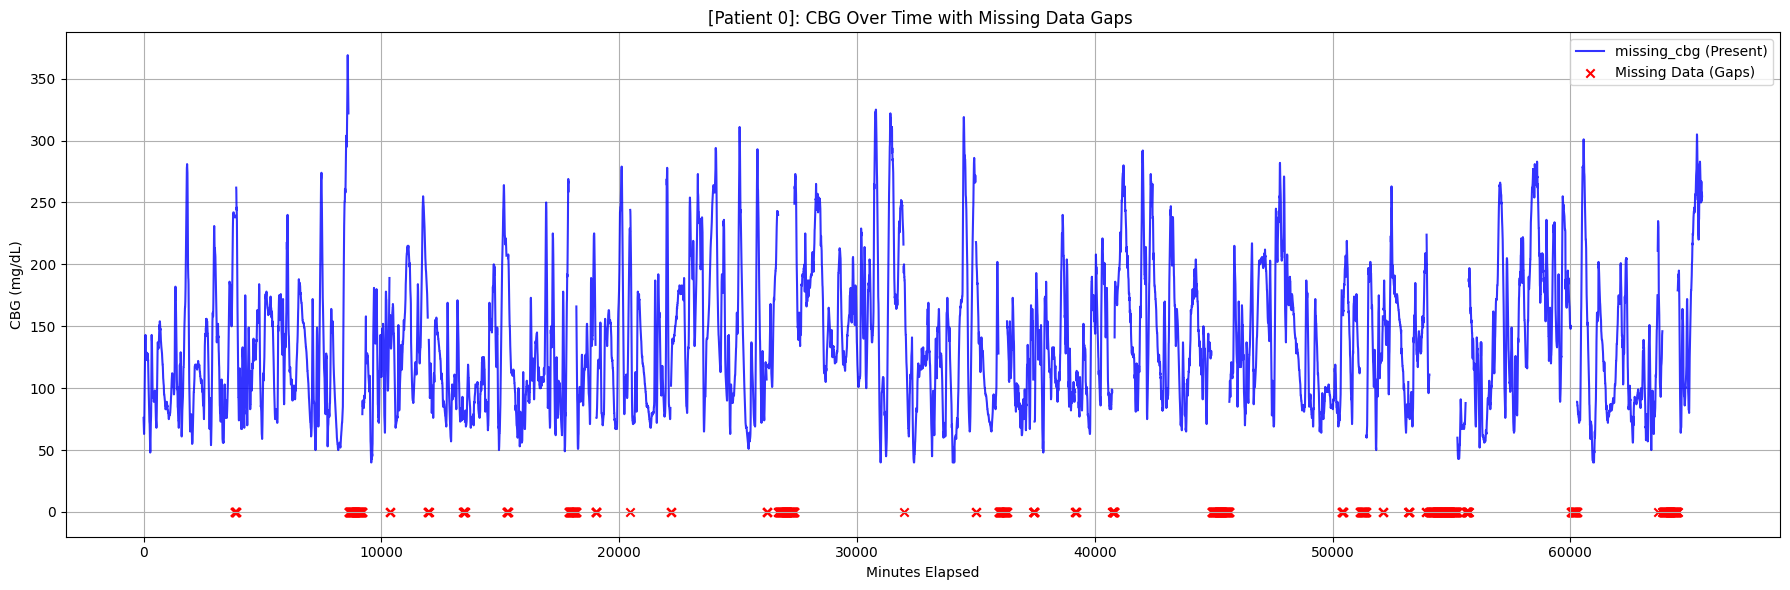

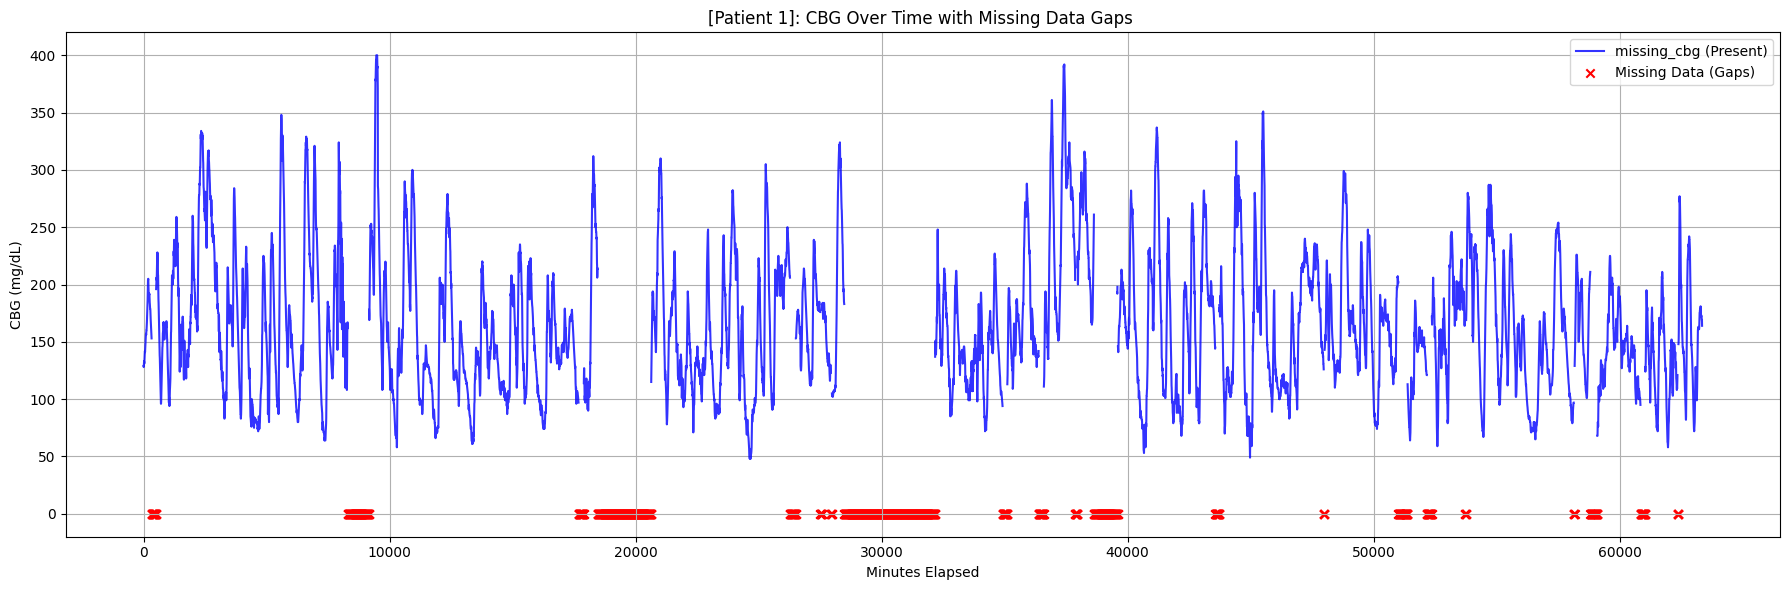

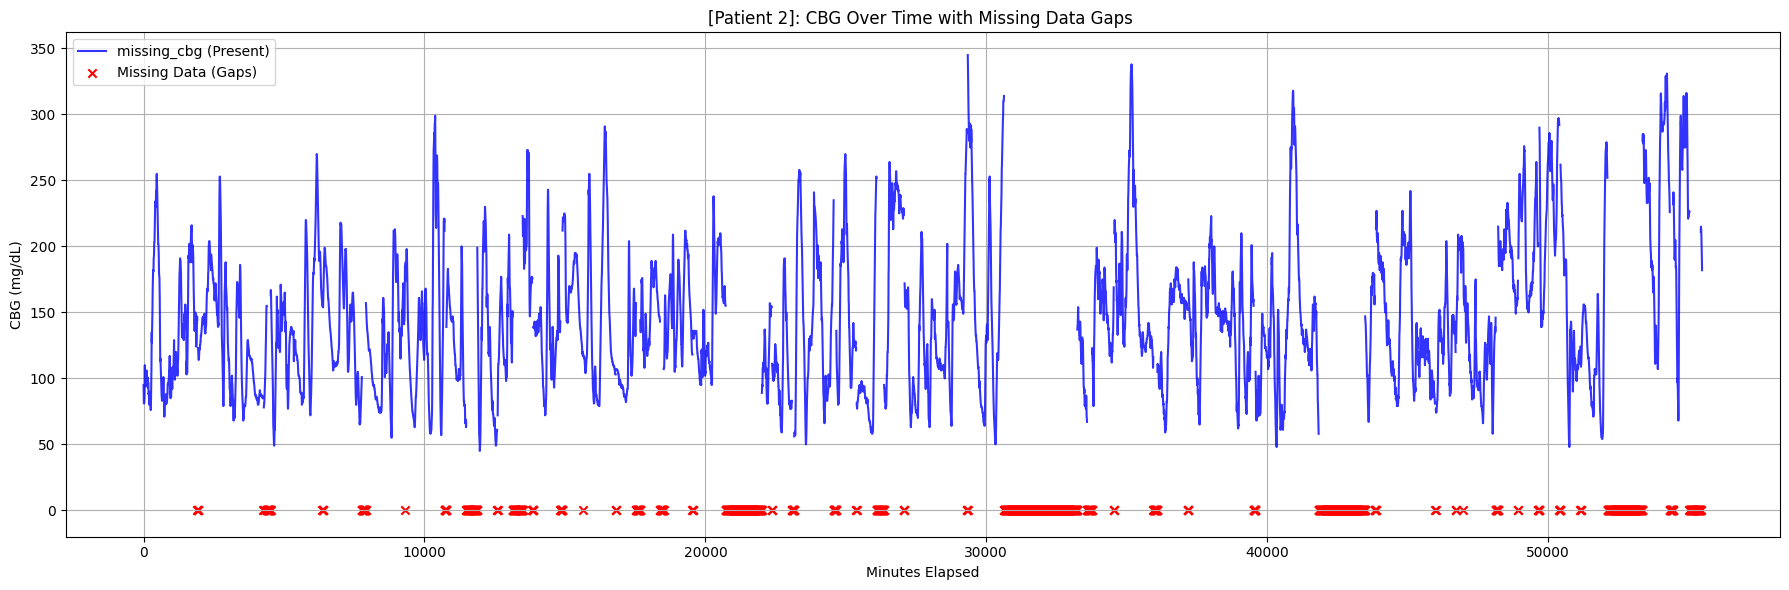

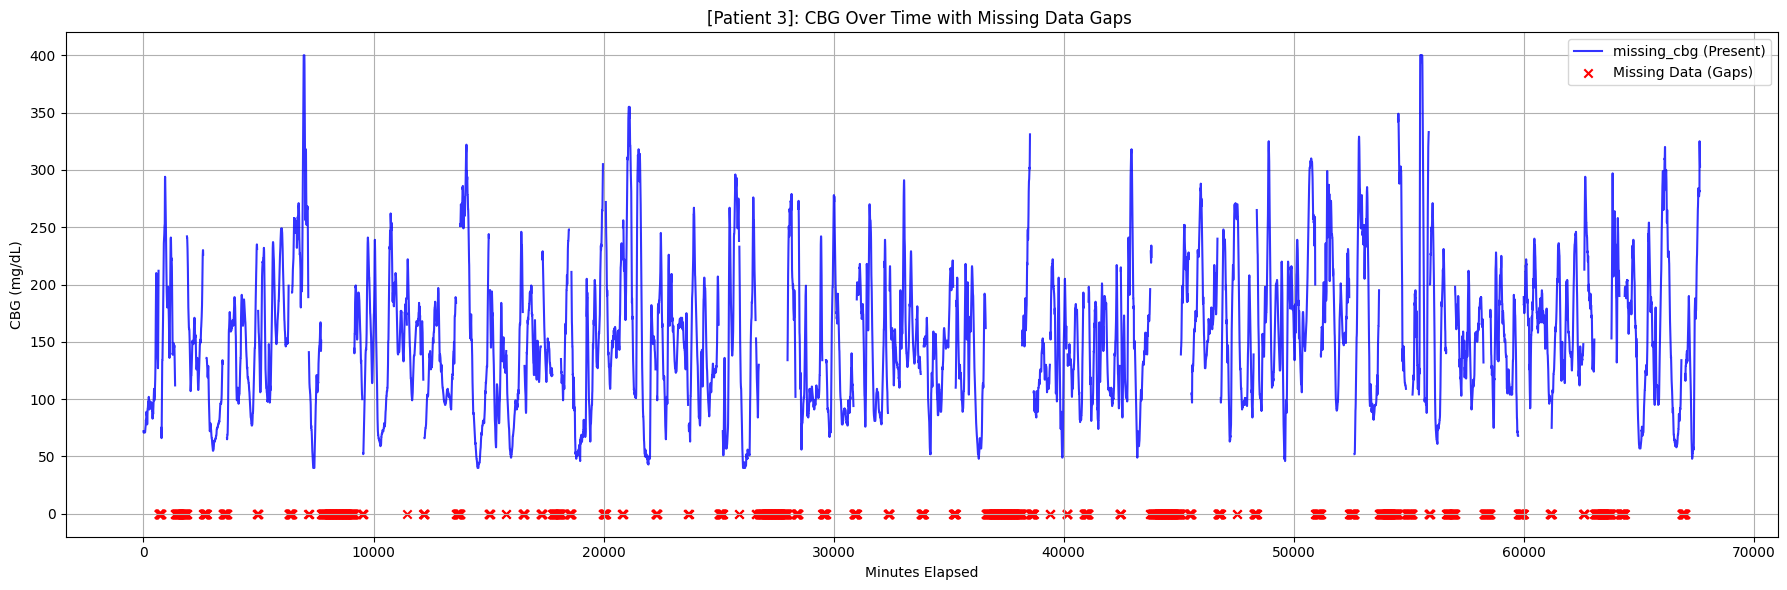

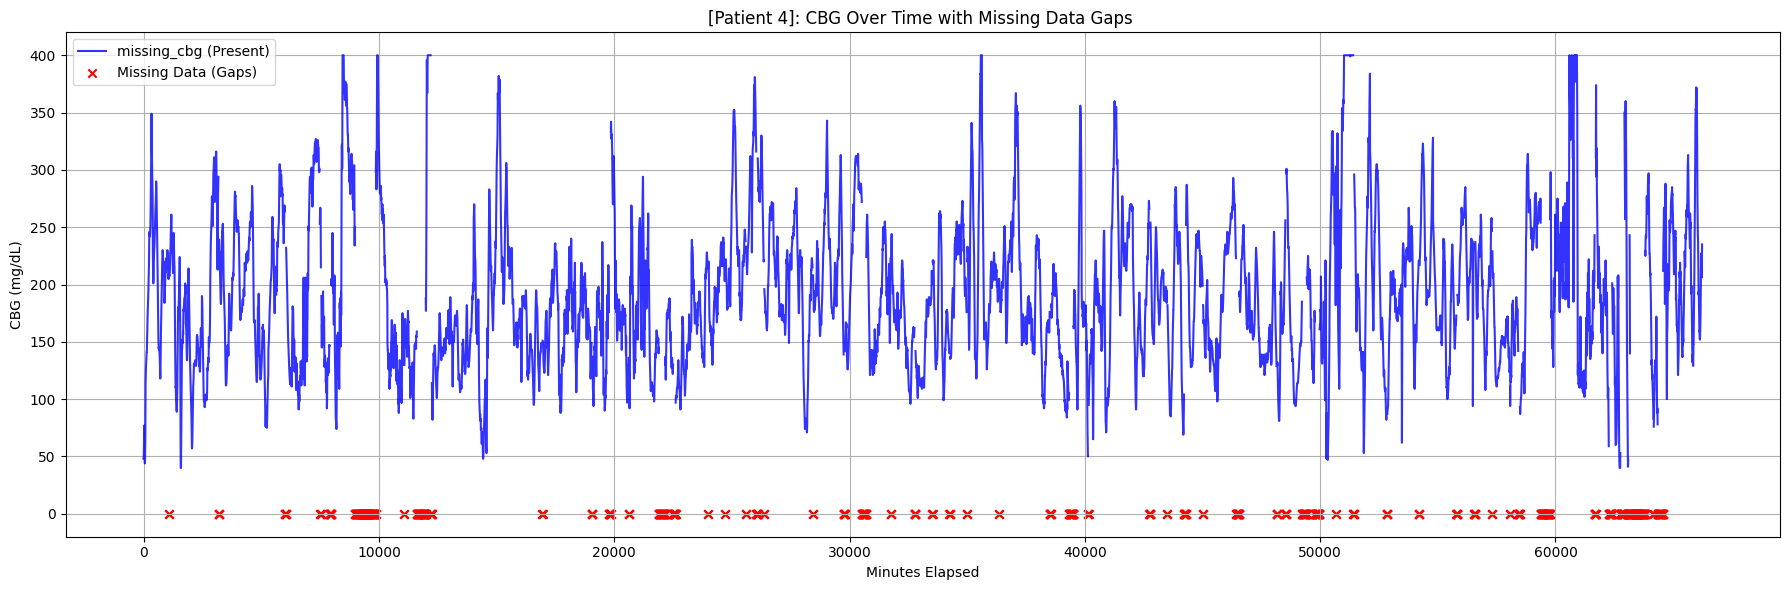

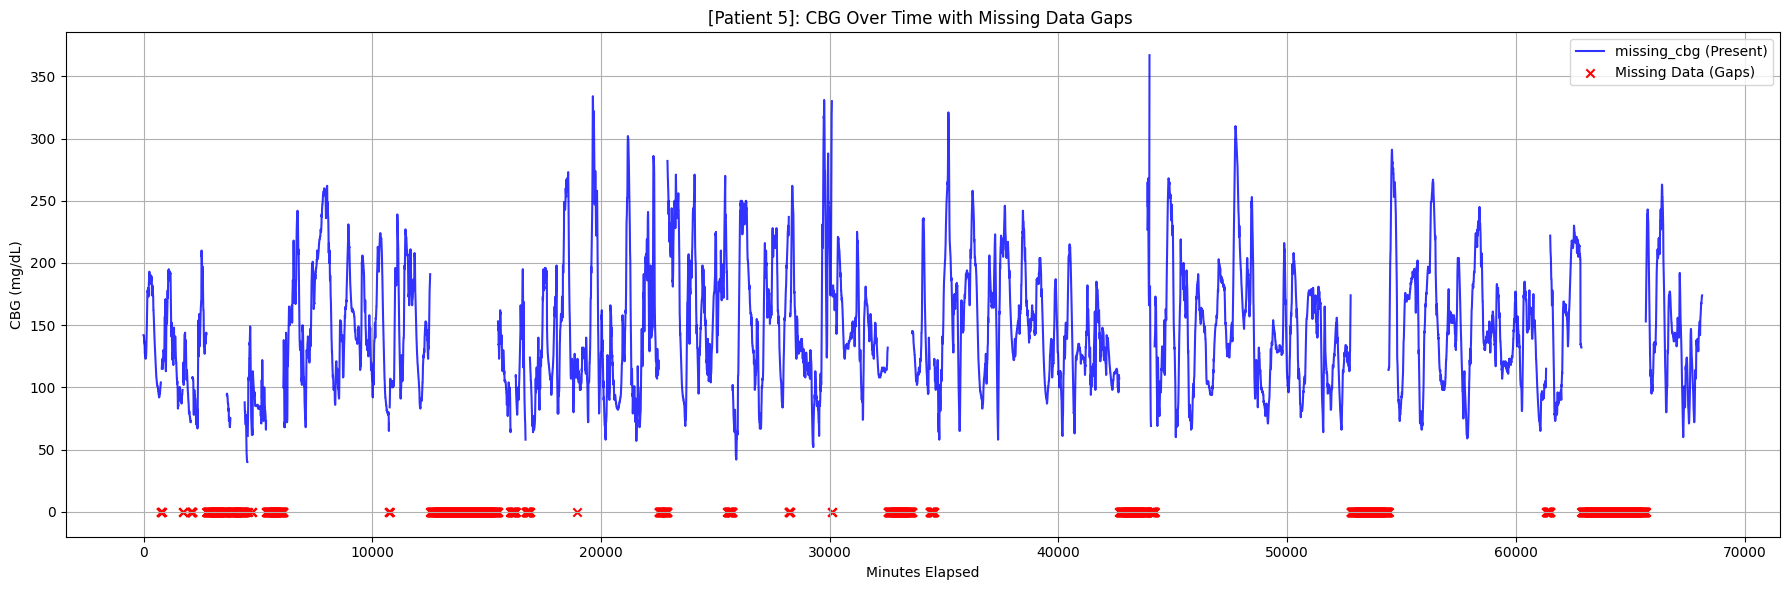

In [72]:
visualizer = PlotVisualizer(figsize=(18, 6))

for index in range(len(train_dict)):
    visualizer.plot_with_scatter_missing_cbg(
            data=train_dict[index],             # plot train patient[0] from OHIO_2020
            x_column='minutes_elapsed',     # x-axis column for time
            y_column='cbg',                 # y-axis column CBG to be plotted
             title=f'[Patient {index}]: CBG Over Time with Missing Data Gaps ', 
            xlabel='Minutes Elapsed',   
            ylabel='CBG (mg/dL)', 
            line_color='blue', 
            scatter_color='red', 
            scatter_marker='x', 
            ylim=(-20, None), 
            alpha=0.8, 
            grid=True)


<h3> 1.3 Visualization of Correlation Matrix

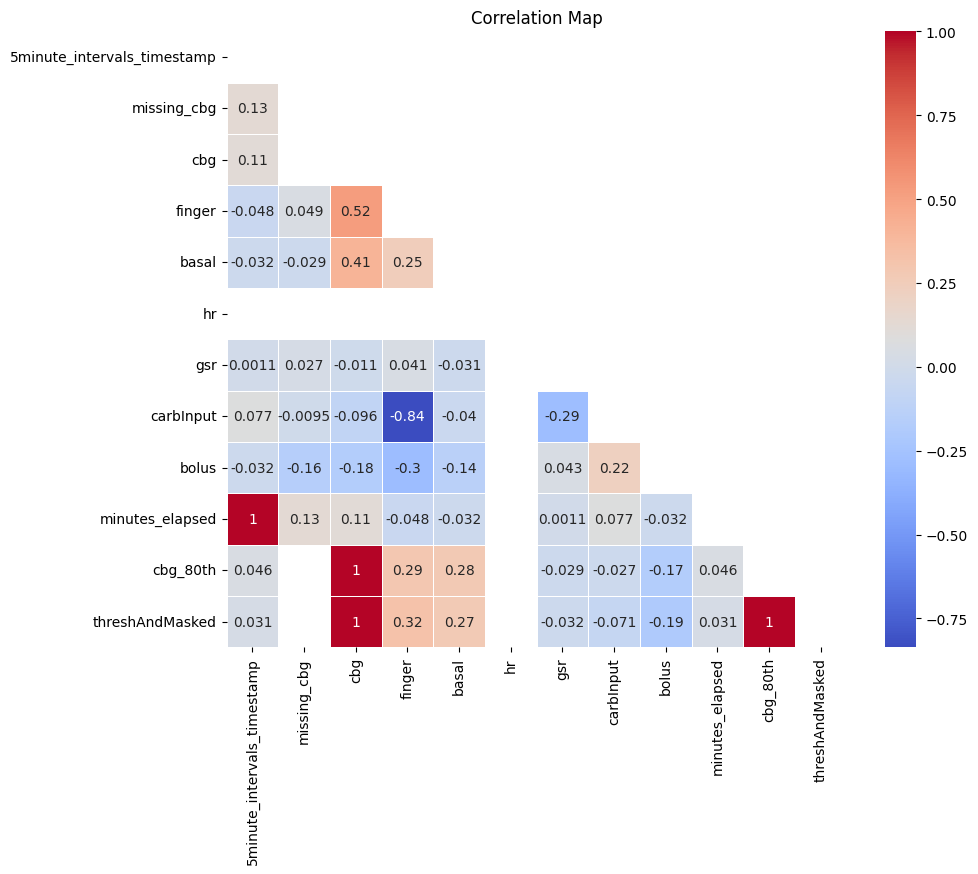

In [73]:
corr_matrix = train_dict[0].corr()

# Plot the upper triangle of the correlation matrix
visualizer.plot_corr_matrix_upper_triangle(corr_matrix)

<h3> 1.4 Visualization of the 80th Percentile of CBG

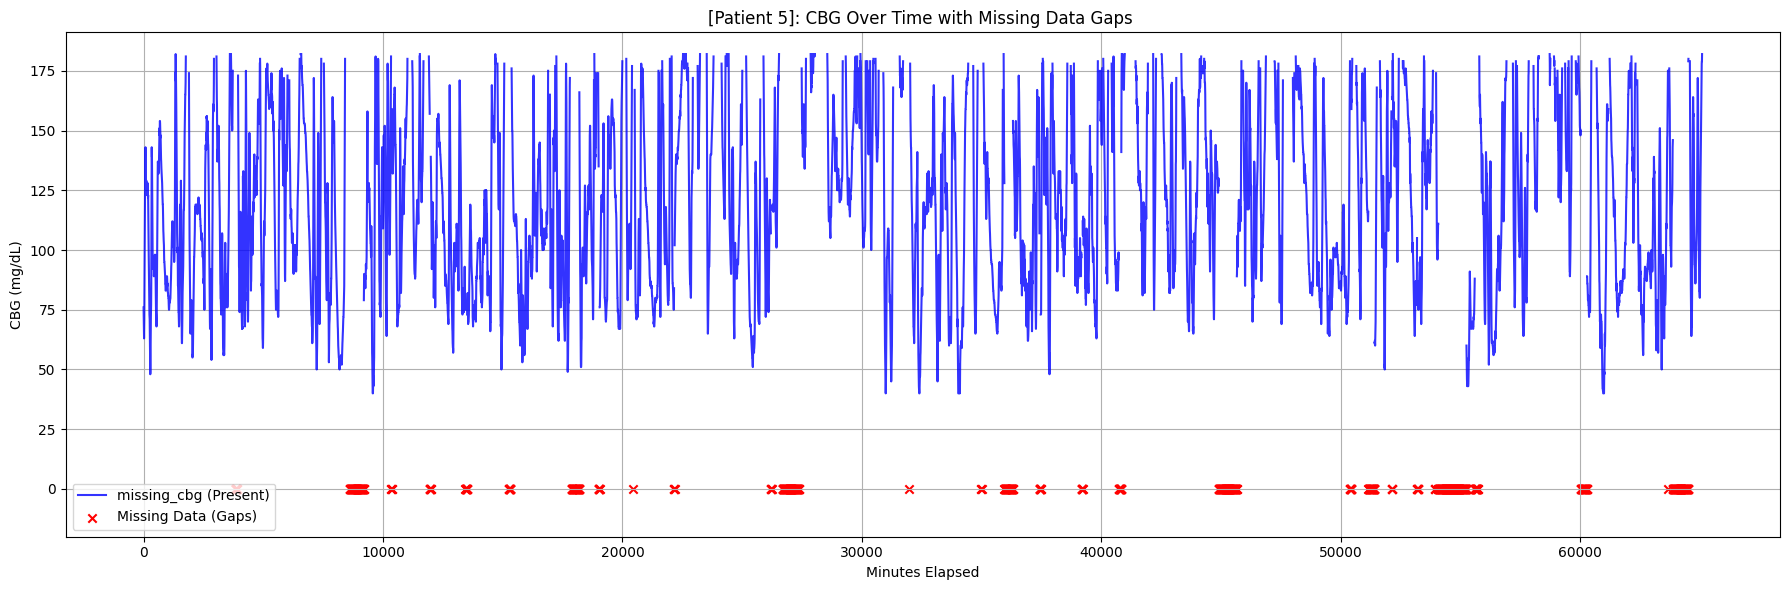

In [74]:
visualizer.plot_with_scatter_missing_cbg(
        data=train_dict[0],             # plot train patient[0] from OHIO_2020
        x_column='minutes_elapsed',     # x-axis column for time
        y_column='cbg_80th',            # y-axis column CBG to be plotted
        title=f'[Patient {index}]: CBG Over Time with Missing Data Gaps ', 
        xlabel='Minutes Elapsed',   
        ylabel='CBG (mg/dL)', 
        line_color='blue', 
        scatter_color='red', 
        scatter_marker='x', 
        ylim=(-20, None), 
        alpha=0.8, 
        grid=True)

In [75]:
# TODO try to read DataPreProcessing file
# TODO print the 80th percentile
# TODO print masked windows 
# TODO figure out masked windows

In [76]:
from utils.PreProcessing import Preprocessing
from scipy.signal import find_peaks

[Preprocessor]:  Loaded 6 files: ['540-ws-training_processed.csv', '544-ws-training_processed.csv', '552-ws-training_processed.csv', '567-ws-training_processed.csv', '584-ws-training_processed.csv', '596-ws-training_processed.csv'] 

[Preprocessor]:  train dict has 6 entries.
Total of 243 non nan sequences
       not nans
count   243.000
mean    269.683
std     281.386
min       3.000
25%     131.000
50%     183.000
75%     281.500
max   1,715.000

Total of 237 nan sequences
         nans
count 237.000
mean   49.599
std   100.232
min     1.000
25%     4.000
50%    12.000
75%    40.000
max   738.000
 



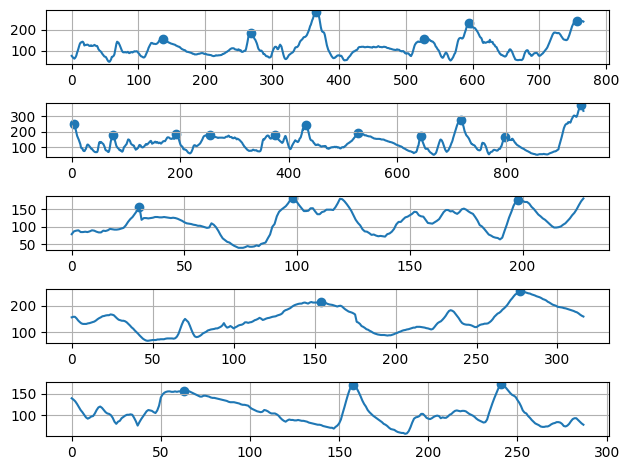

In [77]:
preproc = Preprocessing(TRAIN_PATH)

train_segments = preproc._cont_segments
plt.figure()
n_plots = 5
for i in range(5):
    plt.subplot(n_plots, 1, i+1)
    peaks, __ = find_peaks(train_segments[0][i], height=np.quantile(train_segments[0][i], 0.8), distance=50)
    plt.plot(train_segments[0][i])
    plt.scatter(peaks, train_segments[0][i][peaks])
    plt.grid('on')

plt.tight_layout()
plt.show()